In [1]:
# Exercise 3
# Pick a year and find the relationship between death during work versus age 
# group/gender/education group.

# There is no single correct answer to this exercise. You don't need data science skills to do it. 
# For example, you can produce a heatmap of deaths against age group and education group for each gender, 
# as well as a histogramof deaths by education group for each age group and each gender. Your outcome 
# should be either plots or human readable CSV or JSON files. 


In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load relevant columns from dataset
deaths_2015 = pd.read_csv('mortality/2015_data.csv', 
                          usecols=["sex", "age_recode_12", "education_2003_revision", "activity_code", "injury_at_work"])

In [4]:
# Extract deaths that occurred during work
# activity_code: 2 ("While working for income")
# activity_code: 3 ("While engaged in other types of work")
# injury_at_work: 'Y' ("Yes")

mask = (deaths_2015['activity_code'] == 2) | (deaths_2015['activity_code'] == 3) | (deaths_2015['injury_at_work'] == 'Y')
ddw_2015 = deaths_2015[mask]

In [5]:
# Load json file with code names into a dataframe
# pd.read_json() returns error because json file contains nested NaN values

with open('mortality/2015_codes.json') as f: 
   codes_2015_json = json.load(f)

codes_2015 = pd.DataFrame(codes_2015_json)

In [6]:
# Get human-readable names for age groups

ages = codes_2015[['age_recode_12']].dropna().reset_index()
ages['index'] = ages['index'].astype(int)

In [7]:
# Get human-readable names for education levels

education = codes_2015[['education_2003_revision']].dropna().reset_index()
education['index'] = education['index'].astype(int)

In [8]:
# Match death records to readable cause names and age groups

ddw_2015_merged = ddw_2015.merge(ages, how='left', left_on='age_recode_12', right_on='index').drop(['age_recode_12_x', 'index', 'injury_at_work'], axis=1) 
ddw_2015_merged = ddw_2015_merged.merge(education, how='left', left_on='education_2003_revision', right_on='index').drop(['education_2003_revision_x', 'index', 'activity_code'], axis=1).dropna() 
ddw_2015_merged.columns = ['sex', 'age_group', 'education_level']

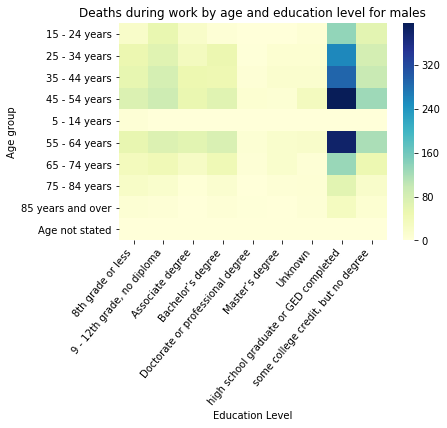

In [54]:
# Plot heatmap of death count against age group and education group for males

plt.figure()
male_deaths = ddw_2015_merged[ddw_2015_merged['sex'] == 'M'].pivot_table(index=['age_group'], columns=['education_level'], aggfunc='count').fillna(0)
p1 = sns.heatmap(male_deaths, cmap="YlGnBu", xticklabels=1)
_ = p1.set(title='Deaths during work by age and education level for males', 
           xlabel='Education Level', ylabel='Age group')
_ = p1.set_xticklabels(labels=male_deaths.columns.get_level_values(1), rotation=50, ha='right')




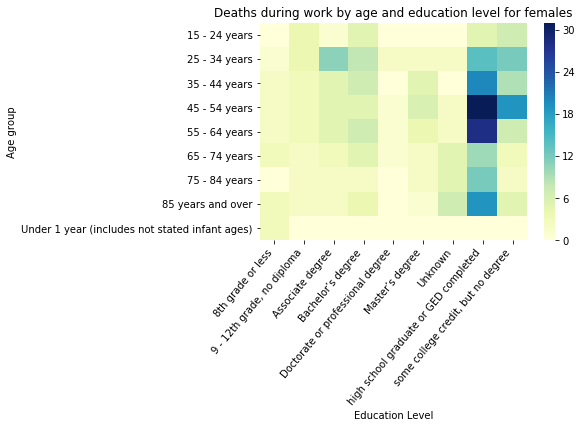

In [53]:
# Plot heatmap of death count against age group and education group for females

plt.figure()
female_deaths = ddw_2015_merged[ddw_2015_merged['sex'] == 'F'].pivot_table(index=['age_group'], columns=['education_level'], aggfunc='count').fillna(0)
# print(female_deaths.columns)
p2 = sns.heatmap(female_deaths, cmap="YlGnBu", xticklabels=1)
_ = p2.set(title='Deaths during work by age and education level for females', 
           xlabel='Education Level', ylabel='Age group')
_ = p2.set_xticklabels(labels=female_deaths.columns.get_level_values(1), rotation=50, ha='right')



